In [16]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in DataFrame format
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better visualization aesthetics


In [17]:
np.random.seed(42)  # Setting random seed for reproducibility

n_samples = 500  # Defining the number of data samples

# Generating random ages between 18 and 60
age = np.random.randint(18, 60, n_samples)

# Generating random heights between 140 cm and 200 cm
height = np.random.randint(140, 200, n_samples)

# Combining age and height as features
X = np.c_[age, height]  

# Creating binary classification labels with some noise
y = (age * 0.5 + height / 5 + np.random.randn(n_samples) * 5 > 50).astype(int) 

# Storing the generated data in a DataFrame
data = pd.DataFrame({'Age': age, 'Height': height, 'Class': y})

# Displaying the first few rows of the dataset
data.head()

,Age,Height,Class
0,56,176,1
1,46,151,0
2,32,188,1
3,25,194,1
4,38,152,1


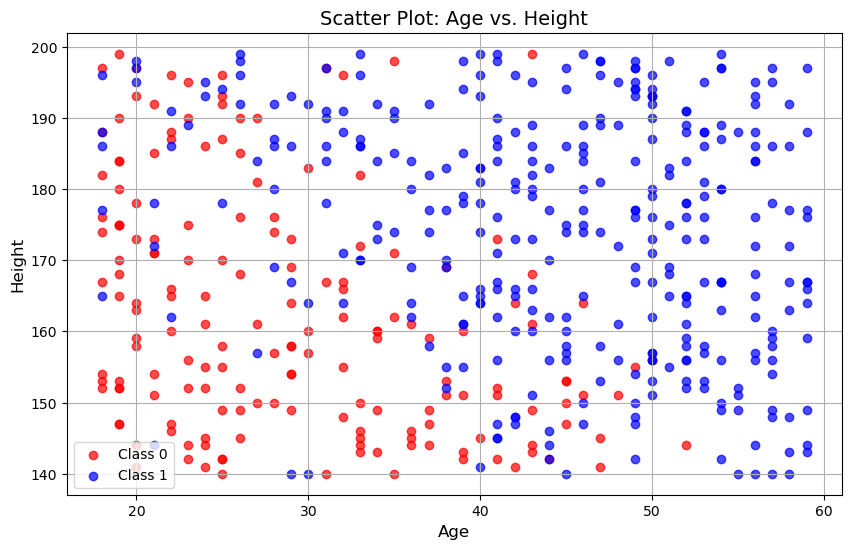

In [18]:
plt.figure(figsize=(10, 6))  # Setting figure size

# Looping through both classes (0 and 1) for color-coded scatter plot
for label, color in zip([0, 1], ['red', 'blue']):
    plt.scatter(data[data['Class'] == label]['Age'],  # X-axis: Age
                data[data['Class'] == label]['Height'],  # Y-axis: Height
                c=color, label=f'Class {label}', alpha=0.7)  # Adding label and color

plt.title('Scatter Plot: Age vs. Height', fontsize=14)  # Setting plot title
plt.xlabel('Age', fontsize=12)  # Label for X-axis
plt.ylabel('Height', fontsize=12)  # Label for Y-axis
plt.legend()  # Displaying the legend
plt.grid(True)  # Adding grid for better readability
plt.show()  # Displaying the plot


In [19]:
# Standardizing features (Mean = 0, Std Dev = 1)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Adding an intercept term (bias)
X = np.c_[np.ones(X.shape[0]), X]


In [20]:
train_size = int(0.8 * n_samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Sigmoid function: Converts input into probability (0 to 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
# Loss function: Computes binary cross-entropy loss
def loss_fn(X, y, beta):
    m = len(y)
    z = X @ beta  # Linear combination
    predictions = sigmoid(z)  # Get probabilities
    loss = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss


In [ ]:
# Gradient Descent for Logistic Regression
def log_reg(X, y, beta, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        z = X @ beta  # Compute predictions
        predictions = sigmoid(z)

        # Compute gradient
        gradient = (1 / m) * (X.T @ (predictions - y))

        # Update parameters
        beta -= learning_rate * gradient

        # Print loss every 1000 iterations
        if i % 1000 == 0:
            loss = loss_fn(X, y, beta)
            print(f"Iteration {i}: loss {loss}")

    return beta

In [24]:
# Initialize coefficients
beta = np.zeros(X_train.shape[1])  
learning_rate = 0.01
num_iterations = 10000

# Train logistic regression model
beta = log_reg(X_train, y_train, beta, learning_rate, num_iterations)

Iteration 0: loss 0.691833078458339
Iteration 1000: loss 0.3771726192325756
Iteration 2000: loss 0.3466966019163067
Iteration 3000: loss 0.33738443316444944
Iteration 4000: loss 0.3335358192320591
Iteration 5000: loss 0.33170791378085585
Iteration 6000: loss 0.33076840788221973
Iteration 7000: loss 0.33026083535516293
Iteration 8000: loss 0.3299772641428966
Iteration 9000: loss 0.3298150687382194


In [25]:
# Function to predict class labels based on probability threshold (default 0.5)
def predict(X, beta, threshold=0.5):
    probabilities = sigmoid(X @ beta)
    return (probabilities >= threshold).astype(int)


In [26]:
# Compute accuracy of predictions
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [27]:
# Predict on training and test sets
y_pred_train = predict(X_train, beta)
y_pred_test = predict(X_test, beta)

# Compute accuracy on test set
test_accuracy = accuracy(y_test, y_pred_test)

# Display the final accuracy result
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Testing Accuracy: 83.00%
